In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset

In [3]:
data=pd.read_csv(r'C:\Users\sreej\Downloads\car_age_price.csv')

In [4]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
data.shape

(112, 2)

In [6]:
#Summary statistics of dataset

In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [9]:
#scatterplot for year and price

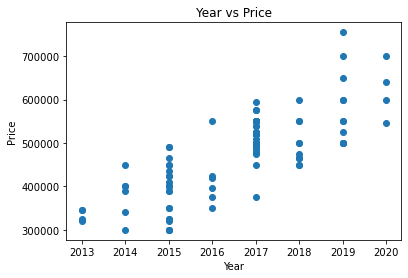

In [10]:
plt.scatter(data['Year'], data['Price'])
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


This plot shows a linear relationship between year and price.

In [11]:
#finding missing values

In [12]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [13]:
#Managing Outliers

<AxesSubplot:>

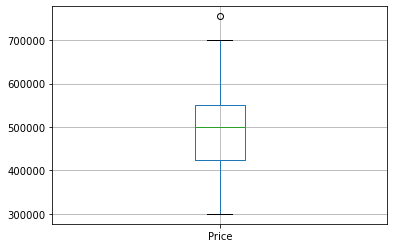

In [14]:
data.boxplot(column=['Price'])

In [15]:
#Boxplot shows that there is only one outlier present in the dataset

In [16]:
Q1=np.percentile(data['Price'],25,interpolation='midpoint')
Q2=np.percentile(data['Price'],50,interpolation='midpoint')
Q3=np.percentile(data['Price'],75,interpolation='midpoint')

In [17]:
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [18]:
IQR=Q3-Q1

In [19]:
print(IQR)

127500.0


In [20]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [21]:
print(low_limit)
print(up_limit)

231250.0
741250.0


In [22]:
outlier=[]
for x in data['Price']:
 if((x >up_limit) or (x< low_limit)):
    outlier.append(x)

In [23]:
outlier

[755000]

In [24]:
#dropping the outlier

In [25]:
ind=data['Price']>up_limit

In [26]:
data.loc[ind].index

Int64Index([1], dtype='int64')

In [27]:
data1=data.drop([1])

In [28]:
data1

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [29]:
#Taking the column 'year' as independent variable and 'price' as dependent variable

In [30]:
X=data1.drop('Price',axis=1)
Y=data1['Price']

In [31]:
#Splitting the dataset into training set and testing set

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [33]:
#Training set

In [34]:
X_train

,Year
27,2017
23,2017
32,2017
48,2016
77,2015
...,...
107,2016
15,2017
93,2017
52,2013


In [35]:
Y_train

27     550000
23     550000
32     550000
48     396000
77     325000
        ...  
107    375000
15     500000
93     520000
52     345000
103    375000
Name: Price, Length: 88, dtype: int64

In [36]:
#Testing set

In [37]:
X_test

,Year
79,2015
11,2018
5,2015
85,2015
65,2017
69,2015
31,2017
46,2019
97,2020
12,2017


In [38]:
Y_test

79     400000
11     500000
5      350000
85     320000
65     495000
69     300000
31     550000
46     500000
97     640000
12     500000
80     390000
81     390000
0      465000
82     390000
19     500000
71     490000
57     550000
73     320000
110    420000
43     550000
13     600000
37     486000
66     525000
Name: Price, dtype: int64

In [39]:
#Evaluating the linear regression model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr=LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [42]:
predictions

array([418695.08304033, 541198.43288521, 418695.08304033, 418695.08304033,
       500363.98293692, 418695.08304033, 500363.98293692, 582032.8828335 ,
       622867.33278179, 500363.98293692, 418695.08304033, 377860.63309203,
       541198.43288521, 418695.08304033, 500363.98293692, 500363.98293692,
       500363.98293692, 337026.18314373, 459529.53298862, 582032.8828335 ,
       582032.8828335 , 500363.98293692, 500363.98293692])

In [43]:
#Calculating the mean_squared_error and r2 

In [44]:
from sklearn.metrics import mean_squared_error,r2_score

In [45]:
print('Mean Squared Error is:',mean_squared_error(Y_test,predictions))
print('R Squared is',r2_score(Y_test,predictions))

Mean Squared Error is: 2360736941.0488067
R Squared is 0.7087665874512326


In [46]:
#lASSO REGRESSION MODEL

In [47]:
from sklearn.linear_model import Lasso

In [48]:
#Evaluating the Lasso Regression Model

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [50]:
#Calculating the mean squared error and r2

In [51]:
#considering alpha=1

In [52]:
lasso_Reg = Lasso(alpha=1)
model=lasso_Reg.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [53]:
predictions

array([418695.74736297, 541197.8959669 , 418695.74736297, 418695.74736297,
       500363.84643225, 418695.74736297, 500363.84643225, 582031.94550155,
       622865.99503618, 500363.84643225, 418695.74736297, 377861.69782832,
       541197.8959669 , 418695.74736297, 500363.84643225, 500363.84643225,
       500363.84643225, 337027.64829369, 459529.79689762, 582031.94550155,
       582031.94550155, 500363.84643225, 500363.84643225])

In [54]:
print('Mean Squared Error is:',mean_squared_error(Y_test,predictions))
print('R Squared is',r2_score(Y_test,predictions))

Mean Squared Error is: 2360749599.6382856
R Squared is 0.7087650258184441


By comparing the two models,we can see that the Rsquared value is high and the mean squared error is less in the linear regression model.Since the larger value of Rsquared value can be able to predict the values of dependent variable(price),the linear regression model will perform better in this case

In this case,70.87% of the variation in car price can be predicted